In [1]:
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"

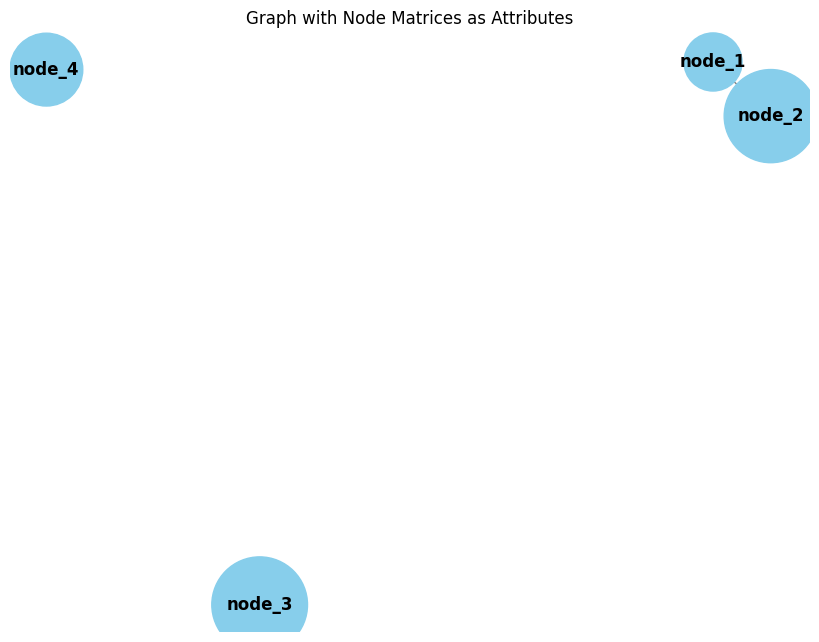

In [20]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

# Generate a random graph of 4 nodes where each node has a 30x31 numpy array
num_nodes = 4
node_shape = (30, 31)

# Create a random graph
G = nx.Graph()

# Add nodes with 30x31 numpy array as attributes
a1 = np.array([[0, 2], [2, 3]])
a2 = np.array([[1, 8], [7, 2]])
a3 = np.array([[0, 3], [7, 9]])
a4 = np.array([[0, 1], [2, 8]])

# 1->2: 1+36+25+1=63
# 1->3: 1+25+36=62
# 1->4: 1+25=26

G.add_node(f"node_1", matrix=a1)
G.add_node(f"node_2", matrix=a2)
G.add_node(f"node_3", matrix=a3)
G.add_node(f"node_4", matrix=a4)

# Correctly add edges between nodes
G.add_edge("node_1", "node_2")
# G.add_edge("node_2", "node_3")
# G.add_edge("node_3", "node_4")

node_positions = nx.spring_layout(G, seed=42)

# We will use the average value of each matrix as the node size for visualization
node_sizes = [np.mean(G.nodes[node]['matrix']) * 1000 for node in G.nodes]

# Draw the graph using node sizes based on the matrix values
plt.figure(figsize=(8, 6))
nx.draw(G, pos=node_positions, with_labels=True, node_size=node_sizes, node_color='skyblue', edge_color='gray', font_weight='bold')
plt.title("Graph with Node Matrices as Attributes")
plt.show()


# Visualize the graph with 2D layout
# plt.figure(figsize=(12, 8))
# node_positions = nx.spring_layout(G, seed=42)  # Position nodes in 2D space using spring layout

# # Plot the nodes, edges, and labels
# nx.draw_networkx_nodes(G, node_positions, node_size=500, node_color='skyblue', alpha=0.7)
# nx.draw_networkx_edges(G, node_positions, width=1.0, alpha=0.5, edge_color='gray')
# nx.draw_networkx_labels(G, node_positions, font_size=10, font_color='black')

# # Set plot title and labels
# plt.title('Random Graph Visualization with Node Attributes (30x31 Matrix)')
# plt.axis('off')  # Turn off the axis for better visualization
# plt.savefig(os.path.join(output_folder, "visualize_num_nodes.png"))

In [19]:
import os
from PIL import Image

# Specify the folder containing the images
folder_path = "../Dataset_log_test/Experiment3/24-11-10-00:16:32/graph"  # Replace this with the path to your folder
output_gif_path = "../Dataset_log_test/Experiment3/24-11-10-00:16:32/output.gif"  # The output path for the GIF

# Get the list of image files in the folder (sorted alphabetically or based on your preference)
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png') or f.endswith('.jpg')]
image_files.sort(key=lambda f: int(os.path.splitext(f)[0]))  # Sorting by the number in the filename

# Load the images
images = []
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)
    images.append(img)

# Save as GIF
images[0].save(output_gif_path, save_all=True, append_images=images[1:], duration=500, loop=0)

print(f"GIF has been saved to {output_gif_path}")


GIF has been saved to ../Dataset_log_test/Experiment3/24-11-10-00:16:32/output.gif


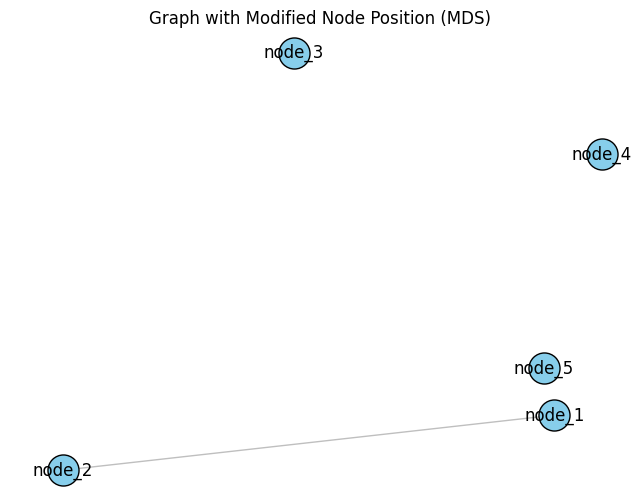

In [27]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.spatial.distance import euclidean

def visualize_graph_with_modified_node_position(G):
    # Function to compute distance between two node matrices (Euclidean distance)
    def compute_distance(node1, node2, G):
        matrix1 = G.nodes[node1]['matrix']
        matrix2 = G.nodes[node2]['matrix']
        return euclidean(matrix1.flatten(), matrix2.flatten())  # Flatten and compute Euclidean distance

    # Compute the pairwise distances between the nodes
    node_names = list(G.nodes)
    num_nodes = len(node_names)

    # Initialize the distance matrix
    distance_matrix = np.zeros((num_nodes, num_nodes))

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            distance = compute_distance(node_names[i], node_names[j], G)
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance  # The matrix is symmetric

    # Apply MDS to reduce the distances to 2D positions
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    node_positions = mds.fit_transform(distance_matrix)

    # Save the initial layout
    # initial_positions = node_positions.copy()

    # Modify only node_1's position slightly (e.g., move it by a small delta)
    delta = np.array([0.2, 0.1])  # Small movement for node_1
    node_positions[0] += delta  # Update only the position of node_1

    # Plot the graph with nodes positioned according to the modified layout
    plt.figure(figsize=(8, 6))

    # Draw the edges of the graph based on its structure
    nx.draw_networkx_edges(G, pos={node: node_positions[i] for i, node in enumerate(node_names)}, alpha=0.5, edge_color='gray')

    # Draw the nodes based on the computed positions
    plt.scatter(node_positions[:, 0], node_positions[:, 1], c='skyblue', s=500, edgecolors='black')

    # Add labels to the nodes
    for i, node in enumerate(node_names):
        plt.text(node_positions[i, 0], node_positions[i, 1], node, fontsize=12, ha='center', va='center')

    # Set plot title and labels
    plt.title("Graph with Modified Node Position (MDS)")
    plt.axis('off')  # Turn off the axis for better visualization
    plt.show()

# Example usage with a predefined graph G:
G = nx.Graph()

# Add nodes with 30x31 numpy array as attributes
a1 = np.array([[0, 2], [2, 3]])
a2 = np.array([[1, 8], [7, 2]])
a3 = np.array([[0, 3], [7, 9]])
a4 = np.array([[0, 1], [2, 8]])
a5 = np.array([[0, 2], [2, 4]])

# Add nodes with matrices as attributes
G.add_node(f"node_1", matrix=a1)
G.add_node(f"node_2", matrix=a2)
G.add_node(f"node_3", matrix=a3)
G.add_node(f"node_4", matrix=a4)
G.add_node(f"node_5", matrix=a5)

# Correctly add edges between nodes
G.add_edge("node_1", "node_2")

# Call the function to visualize the graph
visualize_graph_with_modified_node_position(G)


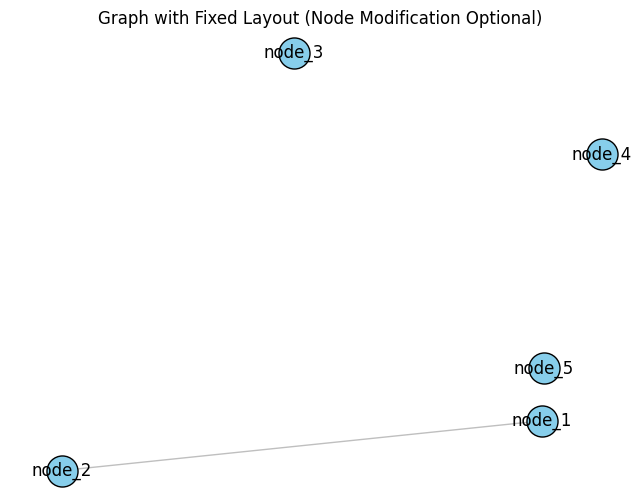

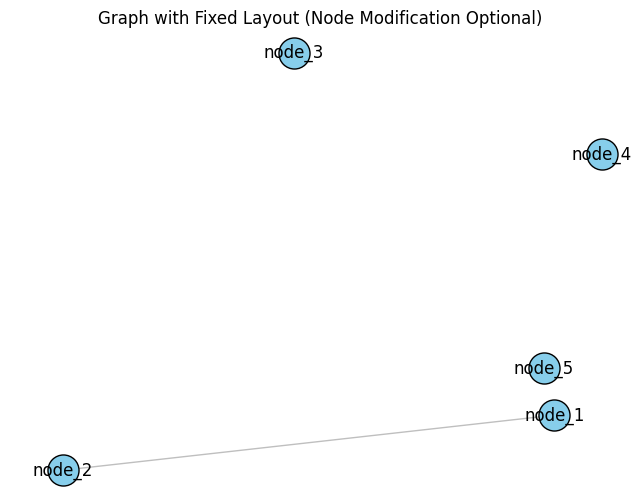

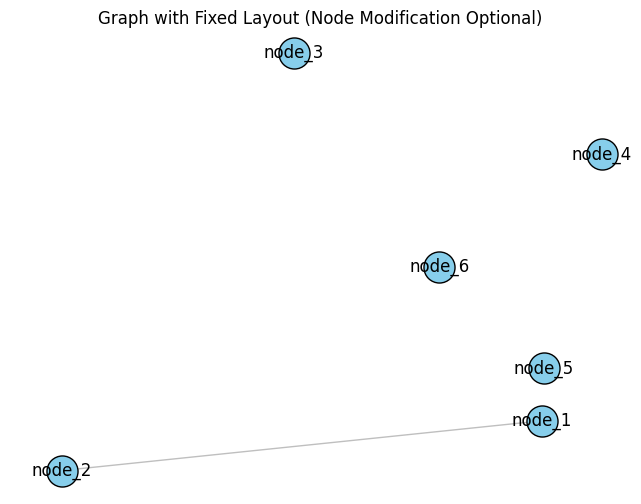

In [33]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.spatial.distance import euclidean

# Function to compute distance between two node matrices (Euclidean distance)
def compute_distance(node1, node2, G):
    matrix1 = G.nodes[node1]['matrix']
    matrix2 = G.nodes[node2]['matrix']
    return euclidean(matrix1.flatten(), matrix2.flatten())  # Flatten and compute Euclidean distance

# Function to calculate the initial layout and fix it for all nodes
def compute_fixed_layout(G):
    node_names = list(G.nodes)
    num_nodes = len(node_names)

    # Initialize the distance matrix
    distance_matrix = np.zeros((num_nodes, num_nodes))

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            distance = compute_distance(node_names[i], node_names[j], G)
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance  # The matrix is symmetric

    # Apply MDS to reduce the distances to 2D positions
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    node_positions = mds.fit_transform(distance_matrix)

    return node_positions

# Function to draw the graph with a fixed layout
def draw_graph_with_fixed_layout(G, fixed_positions, modified_node=None, delta=None):
    """
    Draw the graph with fixed positions for the nodes.
    If a node's position is modified, update that node's position.

    Parameters:
        G (networkx.Graph): The graph to visualize.
        fixed_positions (numpy.array): The fixed 2D positions of the nodes.
        modified_node (str, optional): The node to move.
        delta (numpy.array, optional): The change in position for the modified node.
    """
    # Create a copy of the fixed positions to modify if necessary
    node_positions = fixed_positions.copy()

    if modified_node and delta is not None:
        node_index = list(G.nodes).index(modified_node)
        node_positions[node_index] += delta  # Apply delta to the modified node

    # Plot the graph with nodes positioned according to the fixed layout
    plt.figure(figsize=(8, 6))

    # Draw the edges of the graph based on its structure
    nx.draw_networkx_edges(G, pos={node: node_positions[i] for i, node in enumerate(list(G.nodes))}, alpha=0.5, edge_color='gray')

    # Draw the nodes based on the computed positions
    plt.scatter(node_positions[:, 0], node_positions[:, 1], c='skyblue', s=500, edgecolors='black')

    # Add labels to the nodes
    for i, node in enumerate(list(G.nodes)):
        plt.text(node_positions[i, 0], node_positions[i, 1], node, fontsize=12, ha='center', va='center')

    # Set plot title and labels
    plt.title("Graph with Fixed Layout (Node Modification Optional)")
    plt.axis('off')  # Turn off the axis for better visualization
    plt.show()

# Example usage with a predefined graph G:
G = nx.Graph()

# Add nodes with 30x31 numpy array as attributes
a1 = np.array([[0, 2], [2, 3]])
a2 = np.array([[1, 8], [7, 2]])
a3 = np.array([[0, 3], [7, 9]])
a4 = np.array([[0, 1], [2, 8]])
a5 = np.array([[0, 2], [2, 4]])

# Add nodes with matrices as attributes
G.add_node(f"node_1", matrix=a1)
G.add_node(f"node_2", matrix=a2)
G.add_node(f"node_3", matrix=a3)
G.add_node(f"node_4", matrix=a4)
G.add_node(f"node_5", matrix=a5)

# Correctly add edges between nodes
G.add_edge("node_1", "node_2")

# Compute the fixed layout for the graph
fixed_positions = compute_fixed_layout(G)

# Visualize the graph with the fixed layout
draw_graph_with_fixed_layout(G, fixed_positions)

# Example of modifying `node_1`'s position and visualizing again
delta = np.array([0.2, 0.1])  # Small movement for node_1
new_matrix = np.array([[5, 6], [7, 8]])  # New matrix for node_1
G.nodes["node_1"]['matrix'] = new_matrix  # Update the matrix for node_1

# Recompute layout for the modified node and draw
# The layout for other nodes remains the same, only `node_1`'s position will be updated
draw_graph_with_fixed_layout(G, fixed_positions, modified_node="node_1", delta=delta)

# Example of adding a new node (without affecting the layout of other nodes)
G.add_node(f"node_6", matrix=np.random.rand(2, 2))  # New node with a random matrix
# Compute a new position for the new node (e.g., randomly or near existing nodes)
new_node_position = np.array([0.5, 0.5])  # Just an example of new node position
fixed_positions = np.vstack([fixed_positions, new_node_position])  # Append new node position

# Visualize again with the new node added
draw_graph_with_fixed_layout(G, fixed_positions)
